In [2]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

# Zad
Wygenerujmy punkty w kształcie prostej.

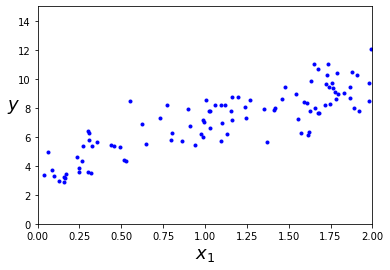

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

# Zad 
Wyznacz parametry prostej regresji (najmniejszych kwadratów) ze wzoru:

$$
\theta= (X^TX)^{-1}  X^T  y; 
$$

gdzie 
$$
X = 
\begin{bmatrix}
1, x_1 \\
1, x_2 \\
\vdots, \vdots \\
1, x_n \\
\end{bmatrix}
$$

Zwizualizuj wynik.

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[3.82172248],
       [3.01468338]])

In [5]:
a, b = theta_best[0], theta_best[1]
X_new = np.linspace(0, 2, 1000).reshape(1000, 1)
y_predict = a * X_new + b

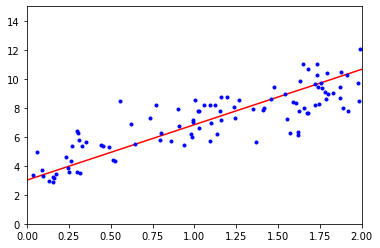

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# Zad.
Prównaj z wynikiem funkcji:
```python
LinearRegression()
```

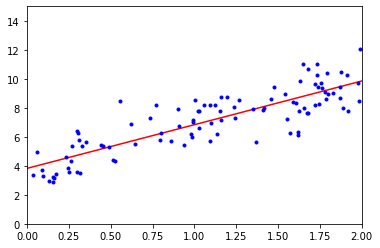

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(X,y)

a, b = lin_reg.coef_, lin_reg.intercept_
X_new = np.linspace(0, 2, 1000).reshape(1000, 1)
y_predict = a * X_new + b

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# Zad.
Wykonaj algorytm minimalizacji gradientowej (w prostej petli).
Wykorzystaj pochodną.

Funkcja kosztu regresji:
$$
MSE(X;\theta) = \frac{1}{m} \sum ( \theta^T x_i - y_i  )^2.
$$

Pochodna funkcja kosztu regresji:

$$
\frac{\partial}{\partial \theta_j}MSE(X;\theta) = \frac{2}{m} \sum ( \theta^T x_i - y_i  )^2 x_i^{j}.
$$

Czyli gradient wynosi:

$$
\nabla_{\theta}MSE(X;\theta) = 
\begin{bmatrix}
    \frac{\partial}{\partial \theta_0}MSE\\
    \frac{\partial}{\partial \theta_1}MSE\\
    \vdots \\
    \frac{\partial}{\partial \theta_d}MSE
\end{bmatrix}
=
\frac{2}{m} X^T(\theta^TX - Y  ).
$$

Metoda gradientowa

$$
\theta^{{Next step}} = \theta - \eta \nabla_{\theta} MSE
$$

### Zapisz wszystkie $\theta$ w liście 

In [13]:
def MSE(X, y, theta):
    return np.sum((y - X.dot(theta.T)) ** 2) / len(X)

# def dMSE_dtheta(X, y, theta):
#     return 2 * X.T.dot(X.dot(theta) - y) / len(X)

def gradient(X, y, theta):
    return 2 * X.T.dot(X.dot(theta) - y) / len(X)

def GD(X, y, theta, eta, n_iters):
    theta_history = np.zeros((n_iters, 2))
    for i in range(n_iters):
        theta = theta - eta * gradient(X, y, theta)
        theta_history[i] = theta
    return theta, theta_history

In [14]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100
theta_path_bgd = []

theta_0 = np.random.randn(2,1)  # random initialization

theta = theta_0

theta, theta_history = GD(X_b, y, theta, eta, n_iterations)

ValueError: could not broadcast input array from shape (2,1) into shape (2,)

In [15]:
theta

array([[1.10425424],
       [1.85705333]])

# Zad
Zaimplemrntu Stochastic Gradient Descent.

### Zapisz wszystkie $\theta$ w liście 

In [10]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

In [3]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = theta_0


[[4.56308925]
 [3.08139533]]


# Zad
Zaimplemrntu Mini-batch gradient descent

### Zapisz wszystkie $\theta$ w liście 

In [4]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

theta = theta_0

In [5]:
print(theta)

# Zad
Narysuj jak zmieniały parametr w różnych metodach.

In [16]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

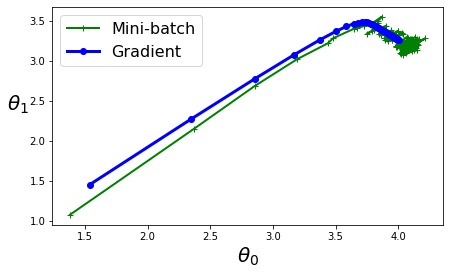